In [58]:
from linien_client.connection import LinienClient
import numpy as np
import time
from linien_common.common import  MHz, Vpp, ANALOG_OUT_V

c = LinienClient(
    host="10.10.222.30",
    user="root",
    password="root"
)
c.connect(autostart_server=True, use_parameter_cache=True)

# read out the modulation frequency
print(c.parameters.modulation_frequency.value / MHz)



Try to connect to 10.10.222.30:18862
Connection established!
8.0


dict_keys(['error_signal', 'control_signal', 'monitor_signal', 'slow_control_signal'])


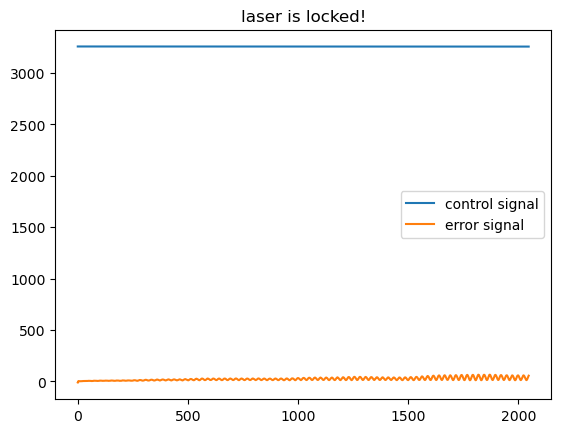

In [34]:
import pickle
from matplotlib import pyplot as plt
plot_data = pickle.loads(c.parameters.to_plot.value)

# depending on the status (locked / unlocked), different signals are available
print(plot_data.keys())

# if unlocked, signal1 and signal2 contain the error signal of channel 1 and 2
# if the laser is locked, they contain error signal and control signal.
if c.parameters.lock.value:
    plt.title('laser is locked!')
    plt.plot(plot_data['control_signal'], label='control signal')
    plt.plot(plot_data['error_signal'], label='error signal')
else:
    plt.title('laser is sweeping!')
    plt.plot(plot_data['error_signal_1'], label='error signal channel 1')
    plt.plot(plot_data['error_signal_2'], label='error signal channel 2')

plt.legend()
plt.show()


In [69]:
c.parameters.control_signal_history.value.keys()

dict_keys(['times', 'values', 'slow_values', 'slow_times'])

In [85]:
d = c.parameters.control_signal_history.value

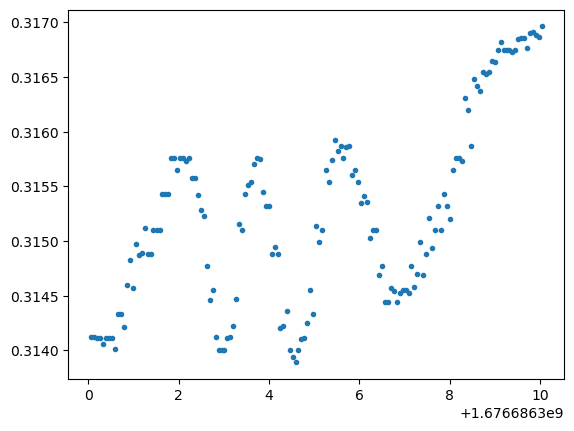

In [88]:
plt.plot(d["times"], 2*np.asarray(d["values"])*ANALOG_OUT_V, '.')

In [98]:
times = []
data = []
for _ in range(10):
    d = c.parameters.control_signal_history.value
    if _ == 0:
        times.extend(d['times'])
        data.extend(d["values"])
    else:
        ts = np.asarray(d["times"])
        ds = np.asarray(d["values"])
        m = ts > times[-1]
        times.extend(ts[m])
        data.extend(ds[m])
    time.sleep(7)

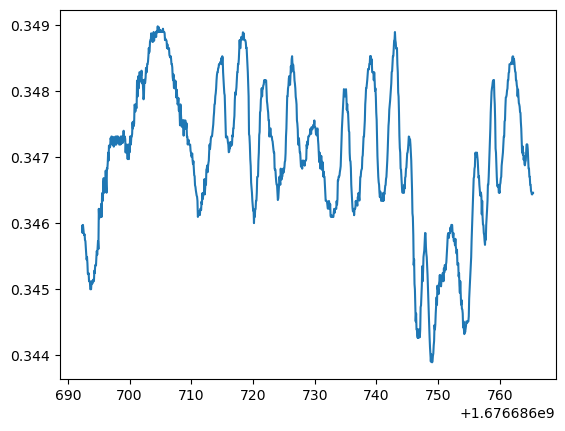

In [99]:
plt.plot(times, np.asarray(data)/(2*Vpp))

In [115]:
import csv
with open('t.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in spamreader:
        print(row[0])
        print(row)

1
['1', '2']
3
['3', '4']


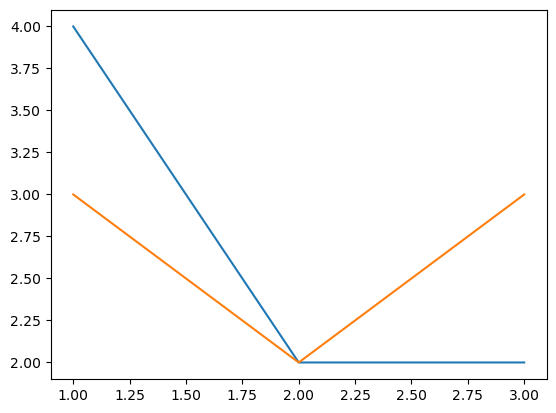

In [2]:
import matplotlib.pyplot as plt
a1=[1,2,3]
a2=[4,2,2]
a3=[3,2,3]
fig, ax = plt.subplots()
ax.plot(a1,a2)
ax.plot(a1,a3)

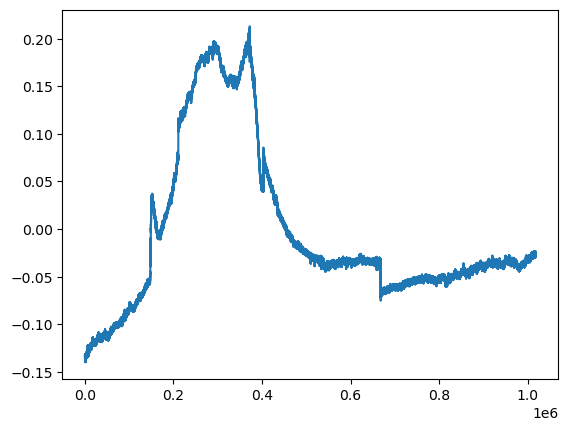

In [3]:
import csv
t = []
v = []
with open("precilaser_log.csv", "r") as csvfiles:
  reader = csv.reader(csvfiles, delimiter=",")
  for row in reader:
    t.append(float(row[0]))
    v.append(float(row[1]))
plt.plot(t,v)

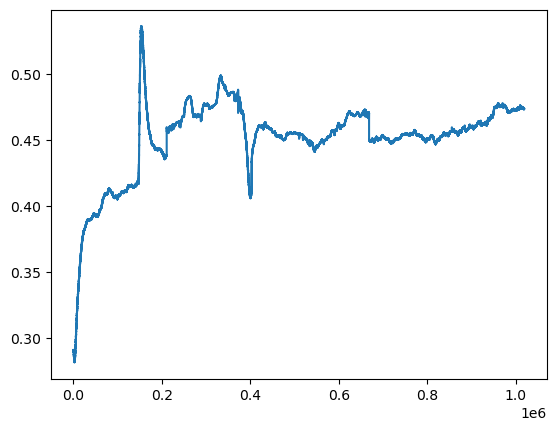

In [4]:
import csv
t = []
v = []
with open("cs-log.csv", "r") as csvfiles:
  reader = csv.reader(csvfiles, delimiter=",")
  for row in reader:
    t.append(float(row[0]))
    v.append(float(row[1]))
plt.plot(t,v)